<a href="https://colab.research.google.com/github/priii-25/Optical-character-recognition/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

In [ ]:
'''im_file = "/content/index_3.jpg"
im = Image.open(im_file)
im.save("/content/sample_data/index_3.jpg")'''
image_file = "/content/index_3.jpg"
img = cv2.imread(image_file)

In [ ]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
#display(image_file)

In [ ]:
#Binary
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite("/content/index_3.jpg", gray_image)

True

In [ ]:
#display("/content/index_3.jpg")

In [ ]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("/content/index_3.jpg", im_bw)

True

In [ ]:
#display("/content/index_3.jpg")

In [ ]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [ ]:
no_noise = noise_removal(im_bw)
cv2.imwrite("/content/index_3.jpg", no_noise)

True

In [ ]:
#display("/content/index_3.jpg")

In [ ]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(no_noise)
cv2.imwrite("/content/index_3.jpg", eroded_image)

True

In [ ]:
#display("/content/index_3.jpg")

In [ ]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
dilated_image = thick_font(no_noise)
cv2.imwrite("/content/index_3.jpg", dilated_image)

True

In [ ]:
#display("/content/index_3.jpg")

In [ ]:
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()

    # Check if the image is already grayscale
    if len(newImage.shape) == 3 and newImage.shape[2] == 3:
        gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    else:
        gray = newImage

    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [ ]:
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [ ]:
fixed = deskew(no_noise)
cv2.imwrite("/content/index_3.jpg", fixed)

41


True

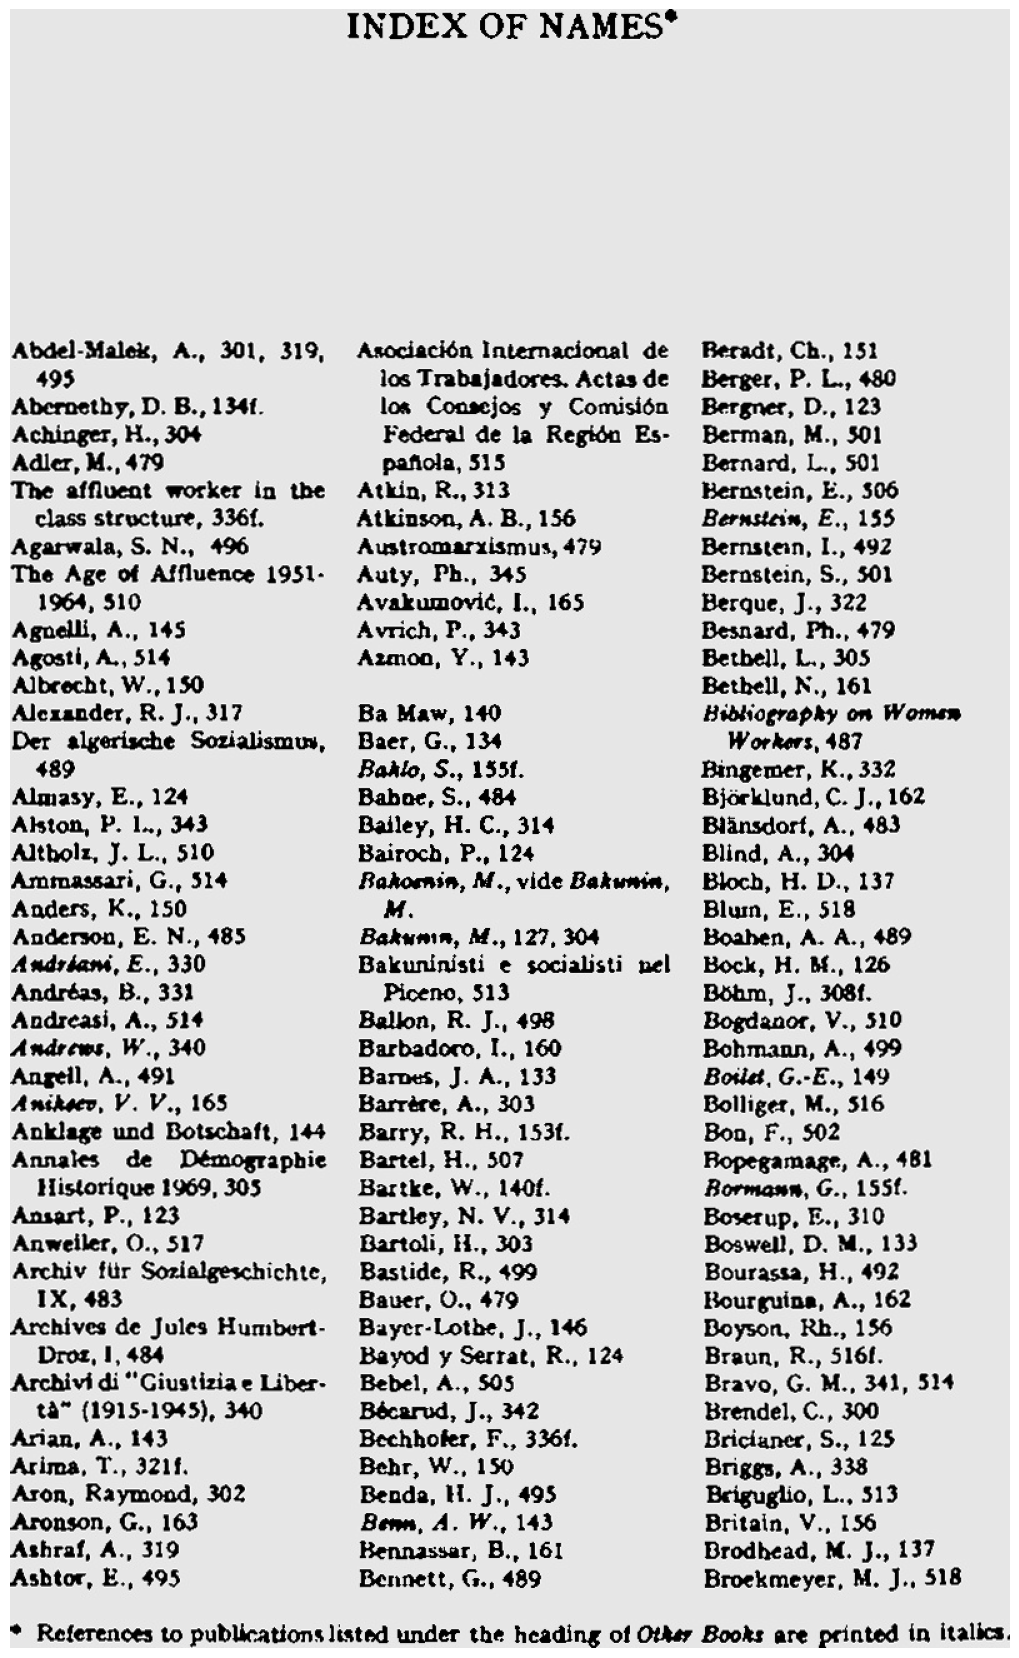

In [ ]:
display("/content/index_3.jpg")

In [ ]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [ ]:
!pip install pytesseract
import pytesseract
from PIL import Image

In [ ]:
img_file = "/content/index_3.jpg"
no_noise = "/content/index_3.jpg"

In [ ]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
img_file = "/content/index_3.jpg"
ocr_result = pytesseract.image_to_string(Image.open(img_file))
print(ocr_result)

Abdel-Malex, A., 301, 319,
495

Abernethy, D. B., 134f.

Achinger, H., 304

Adler, M., 479

The affluent worker in the
class structure, 336f.

Agarwala, S.N., 496

The Age of Affluence 1951-
1964, $10

Agnelli, A., 145

Agosti, A., 514

Albrecht, W., 150

Alexander, R. J., 317

Der algerische Sozialismuy,
489

Almasy, E., 124

Alston, P. L.., 343

Altholz, J. L., 510

Ammassari, G., 514

Anders, K., 150

Anderson, E. N., 485

Andréani, E., 330

Andréas, B., 331

Andreasi, A., 514

Andrews, W., 340

Angell, A., 491

Ansheeo, V. V., 165

Anklage und Botschaft, 144

Annales de Démographie
Historique 1969, 305

Ansart, P., $23

Anweiler, 0., 517

Archiv flr Sozialgeschichte,
1X, 483

Archives de Jules Humbert-
Droz, 1, 484

Archivi di “Giustiziae Liber-
ta” (1915-1945), 340

Arian, A., 143

Arima, T., 3211.

Ason, Raymond, 302

Aronson, G., 163

Ashraf, A., 319

Ashtor, E., 495

* References to publications listed under the heading of Other Books are printed in italics

INDEX OF NAMES*

As